In [3]:
import pandas as pd
import scipy.stats as  stats
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns; 

In [4]:
train = pd.read_csv("/Users/ano/Desktop/projet_2/titanic/titanic_train_cleaner.csv", sep=',')
test = pd.read_csv("/Users/ano/Desktop/projet_2/titanic/titanic_test_cleaner.csv", sep =',')
survivant = train.where(train['Survived']==1).dropna()

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Fare,Embarked,relatives,Title,Age_Class
0,0,0,3,"Braund, Mr. Owen Harris",0,2,1,7,0,1,1,6
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,71,1,1,3,5
2,2,1,3,"Heikkinen, Miss. Laina",1,3,0,7,0,0,2,9
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,53,0,1,3,5
4,4,0,3,"Allen, Mr. William Henry",0,5,0,8,0,0,1,15


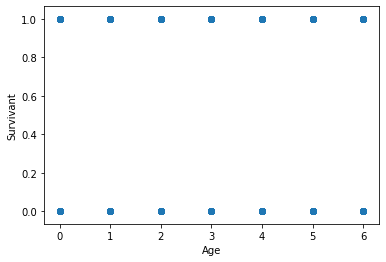

In [11]:
plt.scatter(train['Age'], train['Survived'])
plt.ylabel("Survivant")
plt.xlabel("Age")
train.head(5)

(array([109.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 233.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

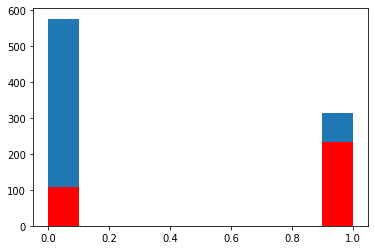

In [8]:
#Le sexe survivant
plt.hist(train['Sex'])
plt.hist(train['Sex'].where(train['Survived'] == 1).dropna(), color="r")

In [10]:
#Faire un test d’hypothèse pour vérifier si oui ou non, les femmes ont été privilégiées lors du
#naufrage.
Tab = pd.crosstab(train['Sex'],train['Survived'])
Tab

Survived,0,1
Sex,,
0,468,109
1,81,233


In [12]:
chi2, pvalue, degrees, expected = stats.chi2_contingency(Tab)

In [13]:
chi2, degrees, pvalue

(260.71702016732104, 1, 1.1973570627755645e-58)

In [15]:
#ON voie bien que la pvalue dépasse alpha qui est de 0,5 donc on rejet l'h0 et on accepte l'hA qui est que les femmes on belle est bien étais prise en comple 

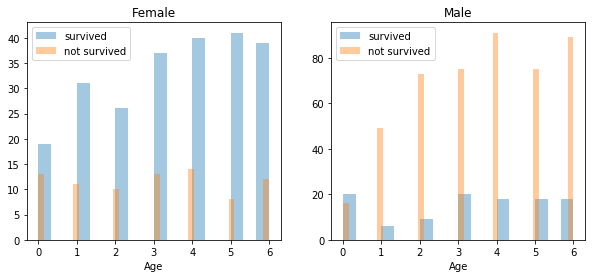

In [34]:
#il serait logique que tout sauf «PassengerId», «Ticket» et «Name» soit en corrélation avec un taux de survie élevé.
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']==1]
men = train[train['Sex']==0]
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [21]:
# les deux graphe montre bien que les femmes on beaucoup étais prise en compte lors de cette naufrage

In [26]:
Tab2 = pd.crosstab(train['Age'],train['Survived'])

Tab3=Tab2[0:1]
print(Tab3)

Survived   0   1
Age             
0         29  39


In [27]:
Tab3

Survived,0,1
Age,,
0,29,39


In [29]:
chi2, pvalue, degrees, expected = stats.chi2_contingency(Tab3)
chi2, degrees, pvalue

(0.0, 0, 1.0)

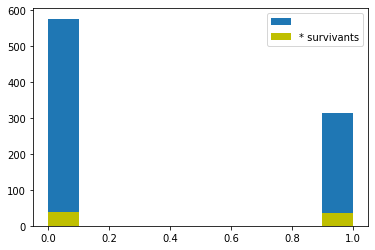

In [49]:
zz = pd.concat([train.where(train["Age"] < 2)])
plt.hist(train['Sex'])
plt.hist(zz['Age'].where(zz['Survived'] == 1 ).dropna(), color='y')
plt.legend(['','* survivants','enfants, et parents',"enfants t"])
#on constate sur cette graphique que le nombre d'enfants dans le titanic de depart en vers on survecue
#sur ce teste j'ai tuiliser les avant de onze ans a 1

In [50]:
# donc on rejette l'hypotese null toujours car  les enfant on belle est bien étais sauvé 
#Conclure.
#oui , les enfants ont été privilégiés lors dunaufrage.
#oui , les femmes ont été privilégiées lors dunaufrage.


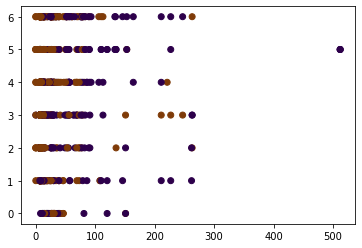

In [51]:
plt.scatter(train['Fare'], train['Age'], c=train['Survived'], cmap="PuOr")

In [ ]:
#On Représentes les passagers du titanic en fonction de leur age et du tarif auquel ils ont payés leurs billets,
#on peut observer en violet les survivants, et on vois bien que plus le tarif du billet est elevée,
#plus les violets sont majoritaires

In [59]:
Tab_fare = pd.crosstab(train['Fare'],train['Survived'])
print(Tab_fare.head(5))

Survived    0   1
Fare             
0          14   1
4           1   0
5           1   0
6          10   1
7         163  50


In [60]:
chi2, pvalue, degrees, expected = stats.chi2_contingency(Tab_fare)
chi2, degrees, pvalue

(222.01213317576202, 90, 3.7715713006253007e-13)

In [ ]:
#le pvalue dépasse tres largement l'alpha on peut refus lh'ypothése nul disant que le pris des billets 
#et les survivant non pas de rapport 